In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import os

%matplotlib inline

In [2]:
path = "D:\AI mini project\Input Images"
dir_list = os.listdir(path)
dir_list

['bird_small.png',
 'Cat.png',
 'Dog.png',
 'Hornbill.png',
 'Hornbillsmall.png',
 'Hornbillsmall2.png',
 'Kingfisher.png']

## How to read image?

In [3]:
# reading the image
# image = io.imread('cat.png')

## Reading all the input images
We will be giving some input images to the model to get them compressed.

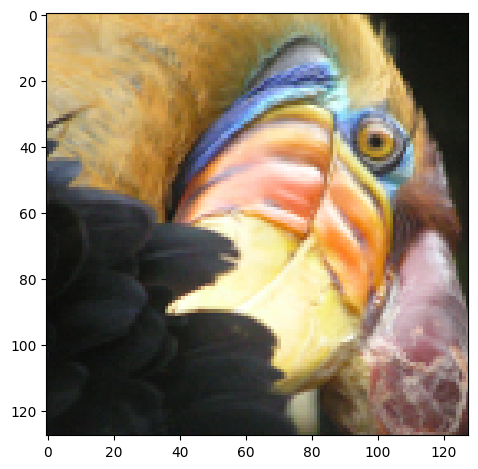

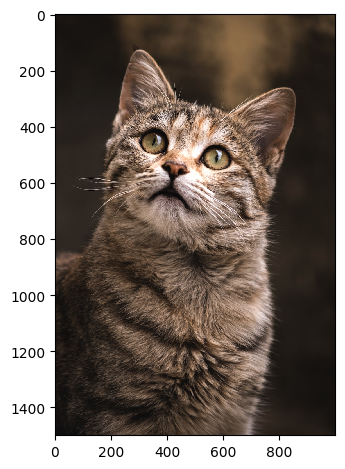

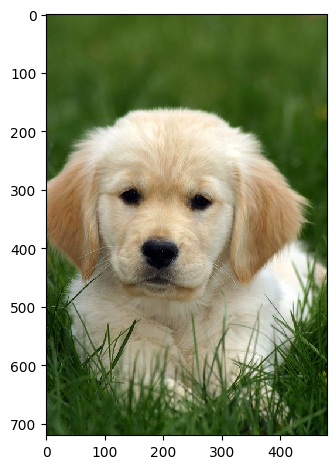

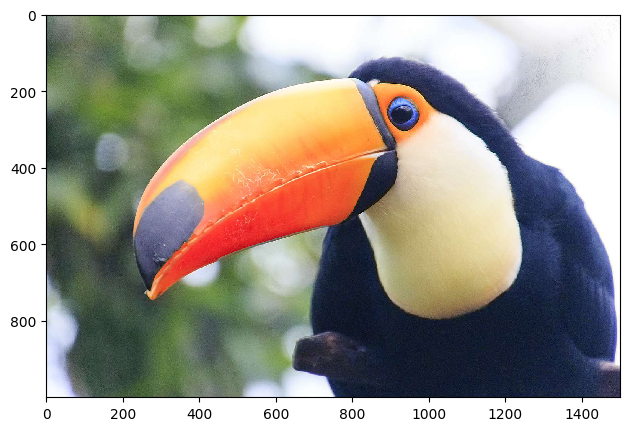

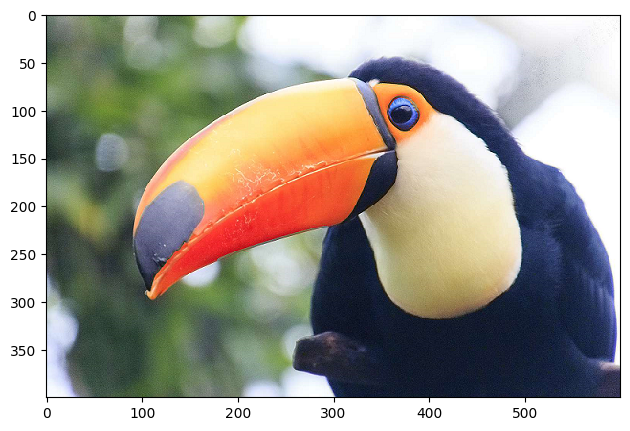

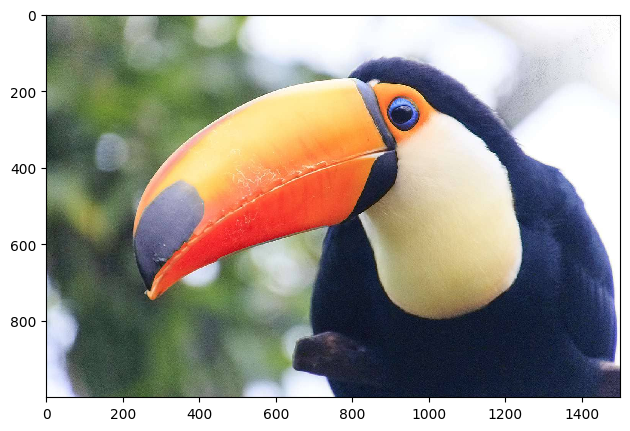

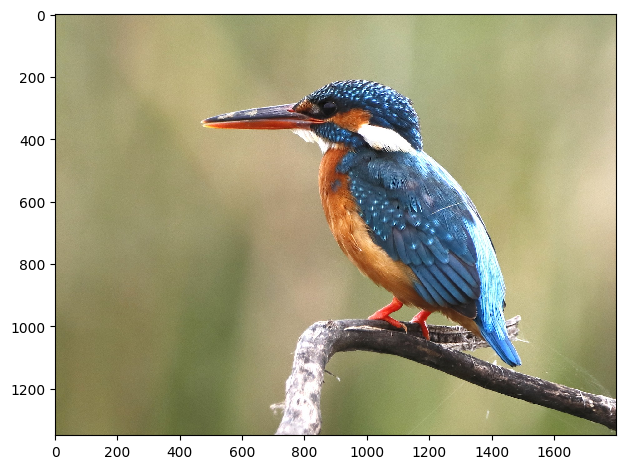

In [4]:
for file in dir_list:
    file_path = os.path.join("D:\AI mini project\Input Images", file)
    file = io.imread(file_path)
    io.imshow(file)
    io.show()

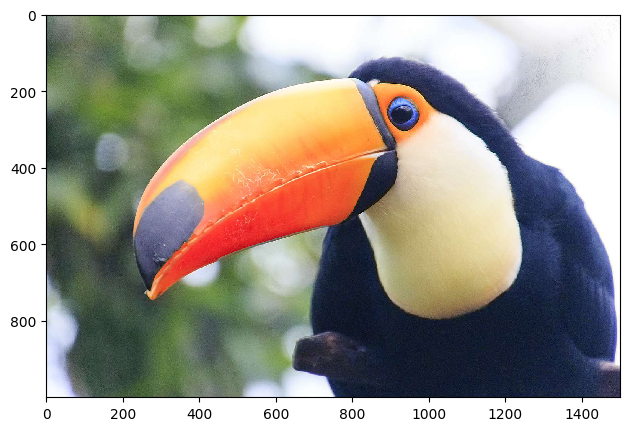

(1000, 1500, 3)

In [9]:
file_path = os.path.join("D:\AI mini project\Input Images",'Hornbill.png')
image = io.imread(file_path)
io.imshow(file)
io.show()
file.shape


In [10]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [11]:
print(image.shape)
print(image[:5])

(1500000, 3)
[[ 77 101  87]
 [ 99 123 109]
 [119 143 129]
 [125 149 135]
 [122 144 131]]


In [12]:
# modelling
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(n_clusters=16)

In [13]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[252, 196, 115],
       [ 90, 111,  75],
       [248, 250, 252],
       [177, 184, 184],
       [ 20,  29,  48],
       [249, 143,  75],
       [139, 155, 133],
       [223, 223, 222],
       [ 65,  75, 120],
       [118, 134,  94],
       [241, 219, 160],
       [181, 168, 116],
       [ 37,  48,  81],
       [235,  69,  46],
       [114, 120, 165],
       [ 60,  74,  63]], dtype=uint8)

In [ ]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

In [ ]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave(f"{image}-compressed.png", newImage);

In [ ]:
io.imshow(newImage);

## All the procees in one function to perform on all the images at once.

                 ORIGINAL IMAGE👇                  


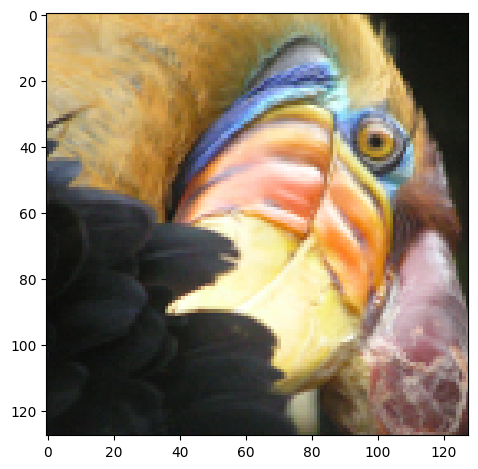

                COMPRESSED IMAGE👇                 


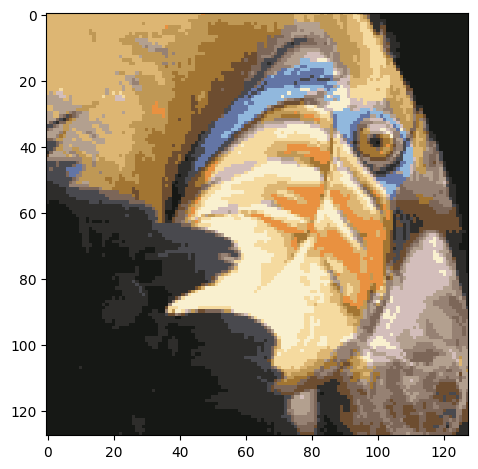

                 ORIGINAL IMAGE👇                  


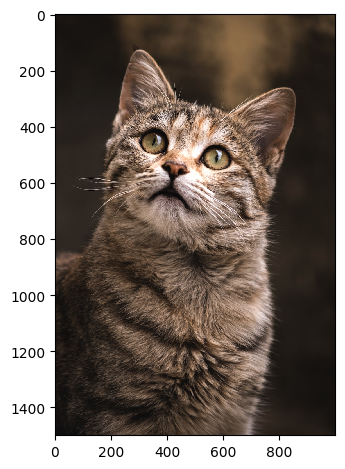

                COMPRESSED IMAGE👇                 


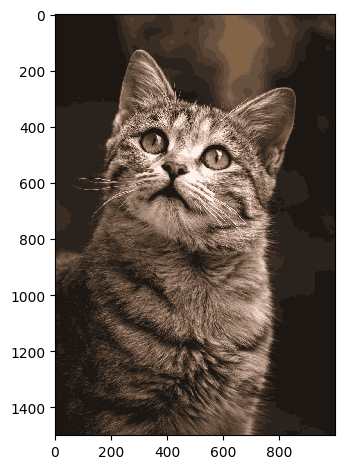

                 ORIGINAL IMAGE👇                  


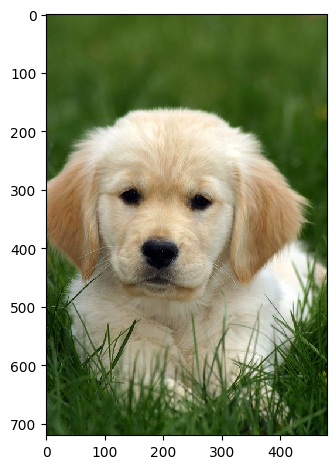

                COMPRESSED IMAGE👇                 


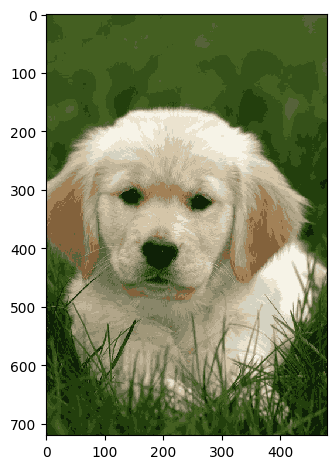

                 ORIGINAL IMAGE👇                  


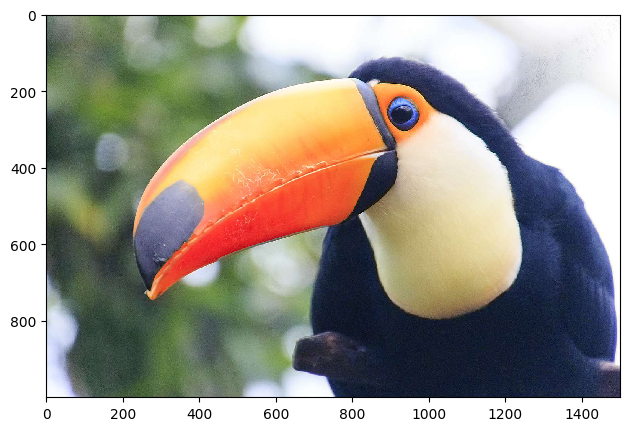

                COMPRESSED IMAGE👇                 


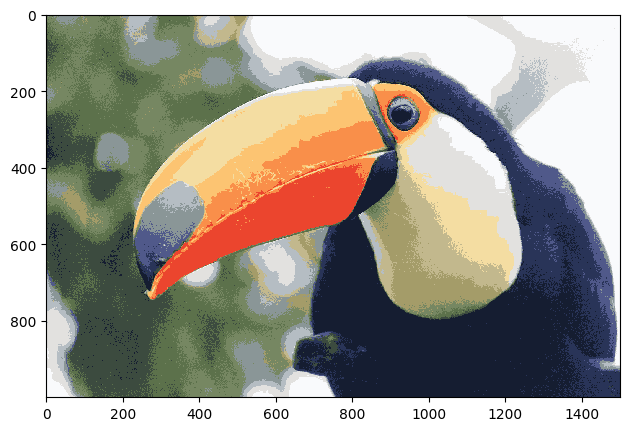

ValueError: cannot reshape array of size 960000 into shape (240000,3)

In [7]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import os

def compress_and_display_image(image_path):
    # Read the image
    image = io.imread(image_path)
    
    # Reshape the image for clustering
    rows, cols = image.shape[0], image.shape[1]
    reshaped_image = image.reshape(rows * cols, 3)
    
    # Apply KMeans clustering
    kMeans = KMeans(n_clusters=16)
    kMeans.fit(reshaped_image)
    
    # Get cluster centers and labels
    centers = np.asarray(kMeans.cluster_centers_, dtype=np.uint8)
    labels = np.asarray(kMeans.labels_, dtype=np.uint8)
    labels = np.reshape(labels, (rows, cols))
    
    # Reconstruct the compressed image
    compressed_image = np.zeros((rows, cols, 3), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            compressed_image[i, j, :] = centers[labels[i, j], :]
    
    # Display original and compressed images
    print('ORIGINAL IMAGE👇'.center(50))
    io.imshow(image)
    io.show()  # Show original image
    print('COMPRESSED IMAGE👇'.center(50))
    io.imshow(compressed_image)
    io.show()  # Show compressed image
    
    # Save the compressed image
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    io.imsave(output_path, compressed_image)

# Specify the input folder and output folder
input_folder = r"D:\AI mini project\Input Images"
output_folder = r"D:\AI mini project\Compressed Images"

# Get the list of image files in the input folder
image_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process and display each image in the folder
for image_path in image_files:
    compress_and_display_image(image_path)


In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans
# import cv2
# import gradio as gr
# from PIL import Image

# def compress_image(input_image):
#     try:
#         # Convert Gradio Image object to numpy array
#         image = input_image.astype(np.uint8)
        
#         # Resize the image for preprocessing
#         resized_image = cv2.resize(image, (100, 100))  # Resize to a smaller dimension
        
        
#         # Reshape the image for KMeans clustering
#         rows, cols, channels = image.shape
#         reshaped_image = image.reshape(rows * cols, -1)
        
#         # Apply KMeans clustering to reduce color depth to 256 colors (8-bit)
#         kmeans = KMeans(n_clusters=8, random_state=0).fit(reshaped_image)
#         compressed_image = kmeans.cluster_centers_[kmeans.labels_]
        
#         # Reshape the compressed image back to original dimensions
#         compressed_image = compressed_image.reshape(rows, cols, channels).astype(np.uint8)
        
#         # Convert numpy array to PIL Image
#         pil_image = Image.fromarray(compressed_image)
        
#         return np.array(pil_image)  # Return as numpy array for Gradio
        
#     except Exception as e:
#         # Handle any errors and return an error message
#         print(f"Error: {str(e)}")
#         return np.zeros((10, 10, 3), dtype=np.uint8)  # Return a small black image for error cases

# # Gradio Interface Configuration
# inputs = gr.Image(label ="Insert Image")
# outputs = gr.Image(type="numpy", label = "Output Image")  # Specify the output type as numpy

# # Gradio Interface
# iface = gr.Interface(fn=compress_image, inputs=inputs, outputs=outputs, live=True, flagging_options=["download"])
# iface.launch(share=True)


## Thank you! ❤
<img src="Input%20Images/Cat.png" alt="Cat Image" width="300"/>

In [15]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import gradio as gr
from PIL import Image
import os

def compress_image(input_image, target_width=100, target_clusters=8):
    try:
        # Convert Gradio Image object to numpy array
        image = input_image.astype(np.uint8)
        
        # Save the input image as a file
        Image.fromarray(image).save("input_image.png")
        
        # Get size of input image in KB
        input_size_kb = os.path.getsize("input_image.png") / 1024
        
        # Get input image resolution and size
        input_resolution = f"Input Resolution: {image.shape[1]}x{image.shape[0]}, Size: {input_size_kb:.2f} KB"
        
        # Resize the image dynamically based on aspect ratio
        resized_image = cv2.resize(image, (target_width, int(target_width / (image.shape[1] / image.shape[0]))))
        
        # Determine clustering parameters based on the current image
        reshaped_image = resized_image.reshape(-1, 3)
        kmeans = KMeans(n_clusters=target_clusters, random_state=0).fit(reshaped_image)
        
        # Reshape the resized image for KMeans clustering
        rows, cols, channels = resized_image.shape
        reshaped_image = resized_image.reshape(rows * cols, -1)
        
        # Apply KMeans clustering to reduce color depth
        compressed_image = kmeans.cluster_centers_[kmeans.predict(reshaped_image)]
        
        # Reshape the compressed image back to original dimensions
        compressed_image = compressed_image.reshape(rows, cols, channels).astype(np.uint8)
        
        # Convert numpy array to PIL Image
        pil_image = Image.fromarray(compressed_image)
        
        # Save the compressed image as a file (optional)
        pil_image.save("compressed_image.png")
        
        # Get size of output image in KB
        output_size_kb = os.path.getsize("compressed_image.png") / 1024
        
        # Get output image resolution and size
        output_resolution = f"Output Resolution: {cols}x{rows}, Size: {output_size_kb:.2f} KB"
        
        return np.array(pil_image), input_resolution, output_resolution
        
    except Exception as e:
        # Handle any errors and return an error message
        print(f"Error: {str(e)}")
        return np.zeros((10, 10, 3), dtype=np.uint8), "Input Resolution: N/A", "Output Resolution: N/A"

# Gradio Interface Configuration
inputs = gr.Image(label="Insert Image")
target_width_slider = gr.Slider(minimum=50, maximum=500, step=1, label="Target Width")
target_clusters_slider = gr.Slider(minimum=4, maximum=32, step=1, label="Target Clusters")
outputs = [gr.Image(type="numpy", label="Output Image"), 
           gr.Textbox(label="Input Resolution"), 
           gr.Textbox(label="Output Resolution")]

# Gradio Interface
iface = gr.Interface(fn=compress_image, inputs=[inputs, target_width_slider, target_clusters_slider], outputs=outputs, title="Image compression using K-Means Algorithm", live=True)
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://3ec24728c8eb8f7c3d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import gradio as gr

def compress_image(input_image, target_width=100, target_clusters=8):
    try:
        # Convert Gradio Image object to numpy array
        image = input_image.astype(np.uint8)
        
        # Get size of input image in KB
        input_size_kb = image.nbytes / 1024
        
        # Get input image resolution and size
        input_resolution = f"Input Resolution: {image.shape[1]}x{image.shape[0]}, Size: {input_size_kb:.2f} KB"
        
        # Resize the image dynamically based on aspect ratio
        resized_image = cv2.resize(image, (target_width, int(target_width * image.shape[0] / image.shape[1])))
        
        # Determine clustering parameters based on the current image
        reshaped_image = resized_image.reshape(-1, 3)
        kmeans = KMeans(n_clusters=target_clusters, random_state=0).fit(reshaped_image)
        
        # Reshape the resized image for KMeans clustering
        rows, cols, channels = resized_image.shape
        reshaped_image = resized_image.reshape(rows * cols, -1)
        
        # Apply KMeans clustering to reduce color depth
        compressed_image = kmeans.cluster_centers_[kmeans.predict(reshaped_image)]
        
        # Reshape the compressed image back to original dimensions
        compressed_image = compressed_image.reshape(rows, cols, channels).astype(np.uint8)
        
        # Get size of output image in KB
        output_size_kb = compressed_image.nbytes / 1024
        
        # Get output image resolution and size
        output_resolution = f"Output Resolution: {cols}x{rows}, Size: {output_size_kb:.2f} KB"
        
        return np.array(compressed_image), input_resolution, output_resolution
        
    except Exception as e:
        # Handle any errors and return an error message
        print(f"Error: {str(e)}")
        return np.zeros((10, 10, 3), dtype=np.uint8), "Input Resolution: N/A", "Output Resolution: N/A"

# Gradio Interface Configuration
inputs = gr.Image(label="Insert Image")
target_width_slider = gr.Slider(minimum=50, maximum=500, step=1, label="Target Width")
target_clusters_slider = gr.Slider(minimum=4, maximum=32, step=1, label="Target Clusters")
outputs = [gr.Image(type="numpy", label="Output Image"), 
           gr.Textbox(label="Input Resolution"), 
           gr.Textbox(label="Output Resolution")]

# Gradio Interface
iface = gr.Interface(fn=compress_image, inputs=[inputs, target_width_slider, target_clusters_slider], outputs=outputs, title="Image compression with K-Means", live=True)
iface.launch(share=True)
